# EDS-296 HW2

Github:

## Import packages

In [1]:
import pandas as pd
import xarray as xr
import matplotlib.pyplot as plt
import numpy as np
import intake
import s3fs
import cartopy.crs as ccrs
import cartopy.feature as cfeature

ERROR 1: PROJ: proj_create_from_database: Open of /opt/anaconda3/envs/eds296-stevenson/share/proj failed


## Load catalog

In [2]:
# Open the CMIP6 data catalog, store as a variable
catalog = intake.open_esm_datastore('https://cmip6-pds.s3.amazonaws.com/pangeo-cmip6.json')

### Define date and extent ranges

In [3]:
# define date ranges
st_yr_1 = 1900
end_yr_1 = 1940

st_yr_2 = 1980
end_yr_2 = 2020

st_yr_sim = 2040
end_yr_sim = 2080

# # US eastern coast bbox
# lat_min, lat_max = 30.53128112265749, 43.699370329338564
# lon_min, lon_max = -82.09455600712974, -68.67407348069887

lat_min, lat_max = 20.998727734654338, 51.314312365802465
lon_min, lon_max = -134.85601392949658, -60.53126615046409

### print catalog

In [4]:
# Convert the catalog to a Pandas datazrame
cat_df = catalog.df

# print the contents of the datazrame
cat_df[cat_df["activity_id"] == "CMIP"].head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
94,CMIP,MOHC,HadGEM3-GC31-MM,piControl,r1i1p1f1,Amon,rsdt,gn,s3://cmip6-pds/CMIP6/CMIP/MOHC/HadGEM3-GC31-MM...,NaN,20170831
520,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,ua,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
521,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,toz,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
522,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,so2,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
523,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,rsutcsaf,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301


## Query Database

The activity_id we are interested in is `CMIP` as that contains historical simulation data.

In [5]:
# Search through catalog, find all historical simulations
res = catalog.search(activity_id="CMIP", experiment_id="historical")

# Convert to a data frame
res_df = res.df

In [6]:
res_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,ua,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
1,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,toz,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
2,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,so2,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
3,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,rsutcsaf,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
4,CMIP,NOAA-GFDL,GFDL-CM4,historical,r1i1p1f1,AERmon,rsutaf,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-CM4/h...,NaN,20180301
...,...,...,...,...,...,...,...,...,...,...,...
86091,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,uas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
86092,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,va,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
86093,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,wap,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207
86094,CMIP,EC-Earth-Consortium,EC-Earth3-Veg,historical,r1i1p1f1,Amon,tas,gr,s3://cmip6-pds/CMIP6/CMIP/EC-Earth-Consortium/...,NaN,20211207


In [7]:
def all_unique_vals(df): 

    # print every unique value
    for i in df:
        print(f"_______{i}_______")
        print(df[i].unique())
        print("\n")

In [8]:
all_unique_vals(res_df)

_______activity_id_______
['CMIP']


_______institution_id_______
['NOAA-GFDL' 'IPSL' 'NASA-GISS' 'CNRM-CERFACS' 'BCC' 'MIROC' 'AWI' 'MRI'
 'NCAR' 'CCCma' 'SNU' 'MOHC' 'EC-Earth-Consortium' 'INM'
 'HAMMOZ-Consortium' 'NUIST' 'CAMS' 'MPI-M' 'E3SM-Project' 'UA' 'NCC'
 'CAS' 'NIMS-KMA' 'KIOST' 'CSIRO-ARCCSS' 'FIO-QLNM' 'CSIRO' 'CCCR-IITM'
 'THU' 'AS-RCEC' 'CMCC']


_______source_id_______
['GFDL-CM4' 'GFDL-ESM4' 'IPSL-CM6A-LR' 'GISS-E2-1-G' 'CNRM-CM6-1'
 'BCC-CSM2-MR' 'BCC-ESM1' 'CNRM-ESM2-1' 'MIROC6' 'AWI-CM-1-1-MR'
 'MRI-ESM2-0' 'CESM2-WACCM' 'CanESM5' 'CESM2' 'SAM0-UNICON' 'GISS-E2-1-H'
 'UKESM1-0-LL' 'EC-Earth3' 'CanESM5-CanOE' 'INM-CM4-8' 'EC-Earth3-Veg'
 'INM-CM5-0' 'HadGEM3-GC31-LL' 'MPI-ESM-1-2-HAM' 'NESM3' 'CAMS-CSM1-0'
 'MPI-ESM1-2-LR' 'MPI-ESM1-2-HR' 'E3SM-1-0' 'MCM-UA-1-0' 'NorESM2-LM'
 'GISS-E2-1-G-CC' 'FGOALS-g3' 'FGOALS-f3-L' 'MIROC-ES2L' 'KACE-1-0-G'
 'NorCPM1' 'CNRM-CM6-1-HR' 'KIOST-ESM' 'NorESM2-MM' 'ACCESS-CM2'
 'FIO-ESM-2-0' 'ACCESS-ESM1-5' 'CESM2-FV2' 'CESM2-WACCM-FV2

#### Geograaphic AOI: Continental United States

The US is 1. a country of great agricultural relevance and 2. includes many areas of the world where surface runoff is a direct cause of many environmental issues such as hypoxia in water ecosystems pollutant contamination, and growth of invasive algaes. It has many water ecosystems both at it's coasts and further inland, as well as a lot of variation the aridity of it's landscapes. Some particular areas of interest in regards to surface runoff are the Delmarva, the Washington estuaries, and the water bodies within proximity of the nation's bread basket.

The problems caused by surface runoff can often times be attributed to infrastructure, but because climate change will alter rainfall and aridity across the globe, the rate of surface runoff itself may also change and the problems therein may become more or less severe.

In [9]:
res_df.variable_id.loc[lambda x: x == "mrros"]

347      mrros
914      mrros
934      mrros
1285     mrros
1675     mrros
         ...  
36484    mrros
44825    mrros
47011    mrros
47077    mrros
47344    mrros
Name: variable_id, Length: 154, dtype: object

## Specify our activity ids

In [10]:
# activity_id = specify project in which simulations fall under
activity_ids = ['ScenarioMIP', 'CMIP'] # future projections and historical

# select NOAA for climate and earth system models (GFDL)
models = "GFDL-ESM4"

# experimental_ids = scenarios (or historical)
scenarios = ['esm-hist', 'ssp370']

# member_id = ensemble member the set of programmed conditions that affect the behavior of the model. We can program a model with different environmental factors, even different physics just to see what happens.
conditions = 'r1i1p1f1'

# table_id = specify spatial and temporal window & resolution
spatial_temporal = 'Lmon' # Monthly land surface and soil model fields

# variable_id = climatic variable
variable = "mrros" # soil moisture content

In [11]:
# grab our target zstore ids
runoff_res = catalog.search(
    
    activity_id=activity_ids, 
    member_id = conditions, 
    experiment_id = scenarios, 
    source_id = models,
    table_id = spatial_temporal, 
    variable_id = variable
    
)

run_df = runoff_res.df

run_df

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,zstore,dcpp_init_year,version
0,ScenarioMIP,NOAA-GFDL,GFDL-ESM4,ssp370,r1i1p1f1,Lmon,mrros,gr1,s3://cmip6-pds/CMIP6/ScenarioMIP/NOAA-GFDL/GFD...,NaN,20180701
1,CMIP,NOAA-GFDL,GFDL-ESM4,esm-hist,r1i1p1f1,Lmon,mrros,gr1,s3://cmip6-pds/CMIP6/CMIP/NOAA-GFDL/GFDL-ESM4/...,NaN,20180701


### Info on models and scenarios

The NOAA GFDL model is one that is particularly good at modeling hydrological phenomena. The ESM model in particular has added components that the CM model doesn't, related to biogeochemical processes that maybe lend it to better be able to model something like surface runoff into the ocean. I chose the ssp370 scenario just because I thought it was most fair to choose a middle of the road scenario for a spatial analysis (even though I personally think the ssp585 scenario is more likely).

### Zarr Preparation

In [12]:
def zarr_prepare(scenario, response_df, start_year, end_year):
    
    # historical
    hist = xr.open_zarr(
        response_df[
            (response_df["experiment_id"] == "esm-hist")]["zstore"].iloc[0], # imput historical data code
        storage_options = {'anon':True}
    ).convert_calendar("standard")

    # future projections
    sim = xr.open_zarr(
        response_df[
            (response_df["experiment_id"] == str(scenario))]["zstore"].iloc[0], # input simulation data code
        storage_options = {'anon':True}
    ).convert_calendar("standard")

    concat = xr.concat([hist, sim], dim = "time") # attach the two
    
    
    sliced = concat.sel(
        time = slice(f"{start_year}-01-01", f"{end_year}-12-31" # specify the time range
        )
    )
    
    # convert sr mm/second to mm/day
    converted = sliced * (60*60*24)
    
    # Time average
    averaged = converted.mean(dim=["time"])
    
    return averaged

### Make graphing functions

In [13]:
def plot_single(data, time_range):

    # Define object containing PlateCarree projection
    map = ccrs.PlateCarree()
    
    # declare colorbar min and max
    cb_min = 0
    cb_max = 3

    # Create figure/axis objects, use the map object to specify associated projection
    fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={"projection": map})
    # Plot temperature data on the axes using the coolwarm colormap
    plot = ax.pcolormesh(data["mrros"].lon, data["mrros"].lat, data["mrros"], transform=map, cmap="BuGn", vmin = cb_min, vmax = cb_max)

    # Set spatial extent of plot
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add colorbar and label it
    cbar = plt.colorbar(plot, ax=ax, orientation = "horizontal")
    cbar.set_label("Surface Runoff (mm/day)")
    # Add coastline/border lines
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    # Add grid lines
    gl = ax.gridlines(draw_labels=True, linestyle="--") 
    gl.top_labels = False
    # Add title, show plot
    ax.set_title(f"Surface Runoff for {time_range} (mm/day)", fontsize= 20)
    plt.show()
    

In [14]:
def plot_difference(data_recent, data_older, time_range): 
    
    # Define object containing PlateCarree projection
    map = ccrs.PlateCarree()
    
    # declare colorbar min an dmax
    cb_min = 0
    cb_max = 1.5

    # Create figure/axis objects, use the map object to specify associated projection
    fig, ax = plt.subplots(figsize=(12, 7), subplot_kw={"projection": map})
    # Plot temperature data on the axes using the coolwarm colormap
    plot = ax.pcolormesh(data_recent["mrros"].lon, data_recent["mrros"].lat, data_recent["mrros"] - data_older["mrros"], transform=map, cmap="RdBu_r", vmin = -0.5, vmax = 0.5)

    # Set spatial extent of plot
    ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())

    # Add colorbar and label it
    cbar = plt.colorbar(plot, ax=ax, orientation = "horizontal")
    cbar.set_label("Surface Runoff Difference (mm/day)")
    # Add coastline/border lines
    ax.add_feature(cfeature.COASTLINE)
    ax.add_feature(cfeature.BORDERS, linestyle=":")
    # Add grid lines
    gl = ax.gridlines(draw_labels=True, linestyle="--") 
    gl.top_labels = False
    # Add title, show plot
    ax.set_title(f"Surface Runoff Change for time ranges\n{time_range} (mm/day)", fontsize= 20)
    plt.show()

## Prepare and plot

In [15]:
plot_ready_370_1 = zarr_prepare("ssp370", run_df, st_yr_1, end_yr_1)

plot_ready_370_2 = zarr_prepare("ssp370", run_df, st_yr_2, end_yr_2)

plot_ready_370_sim = zarr_prepare("ssp370", run_df, st_yr_sim, end_yr_sim)

#### Individual time ranges

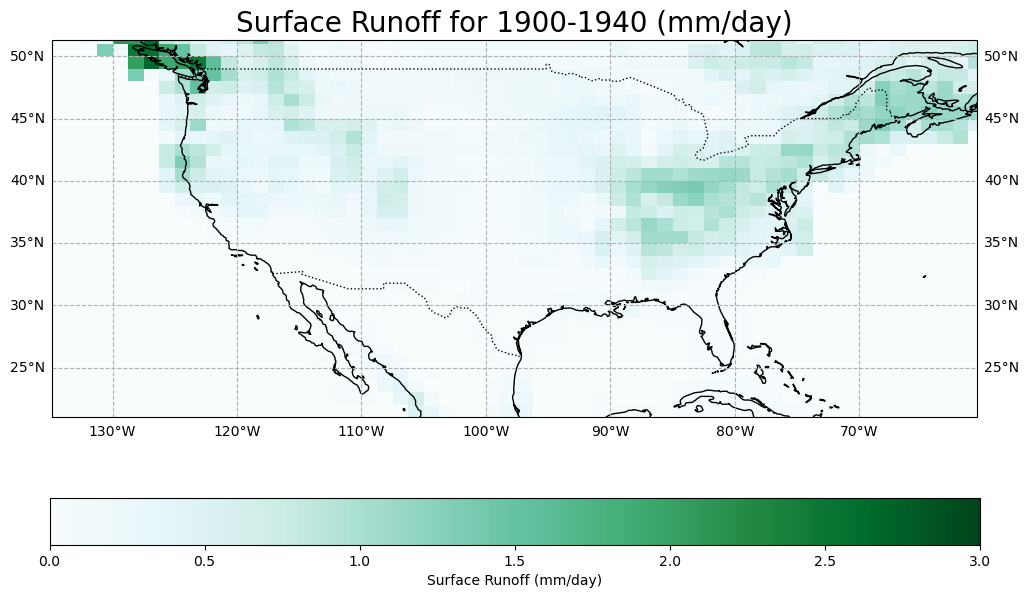

In [16]:
plot_single(plot_ready_370_1, "1900-1940")

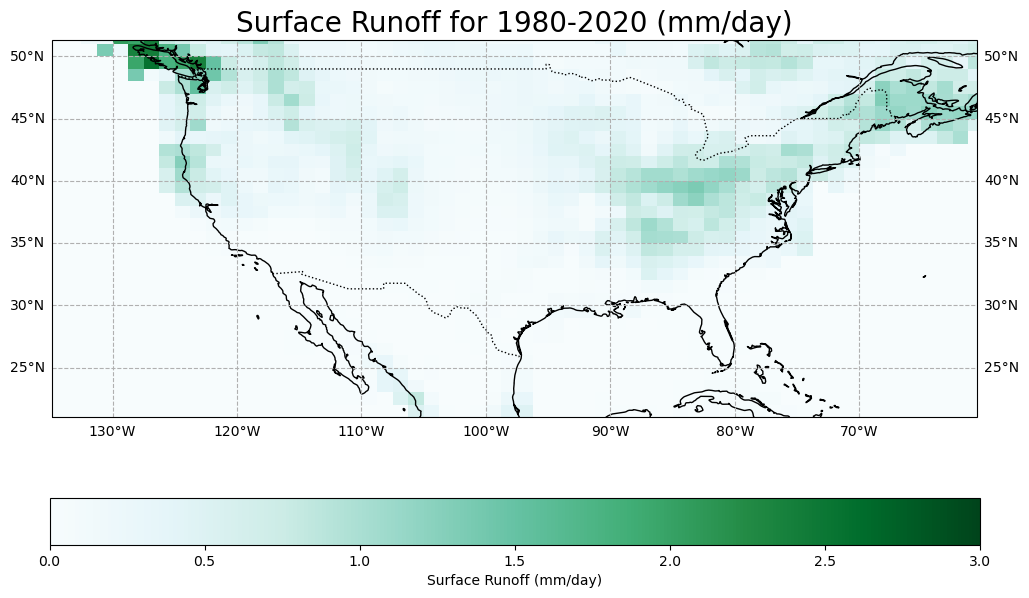

In [17]:
plot_single(plot_ready_370_2, "1980-2020")

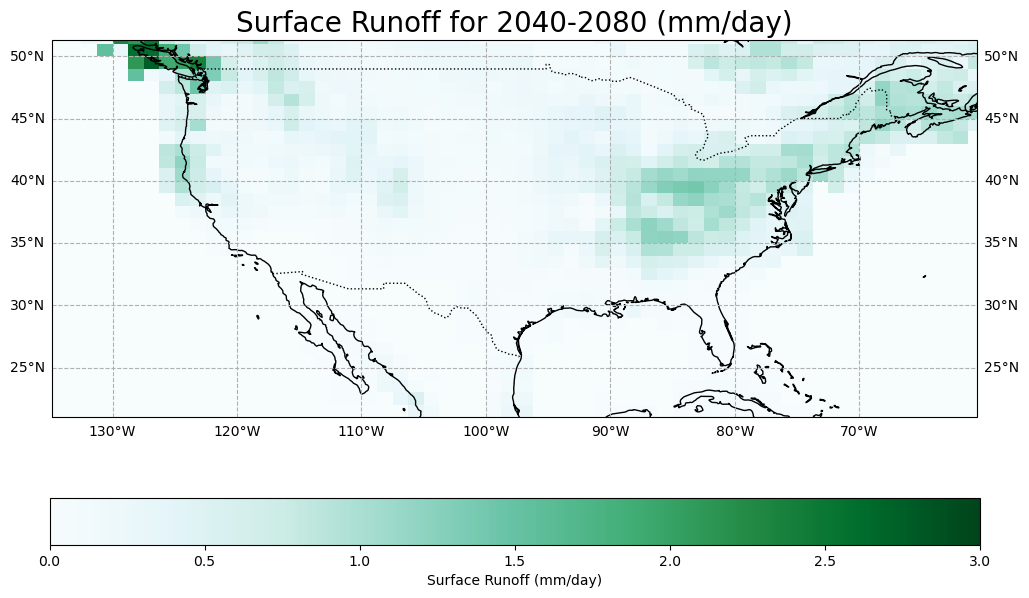

In [18]:
plot_single(plot_ready_370_sim, "2040-2080")

#### Difference between time ranges

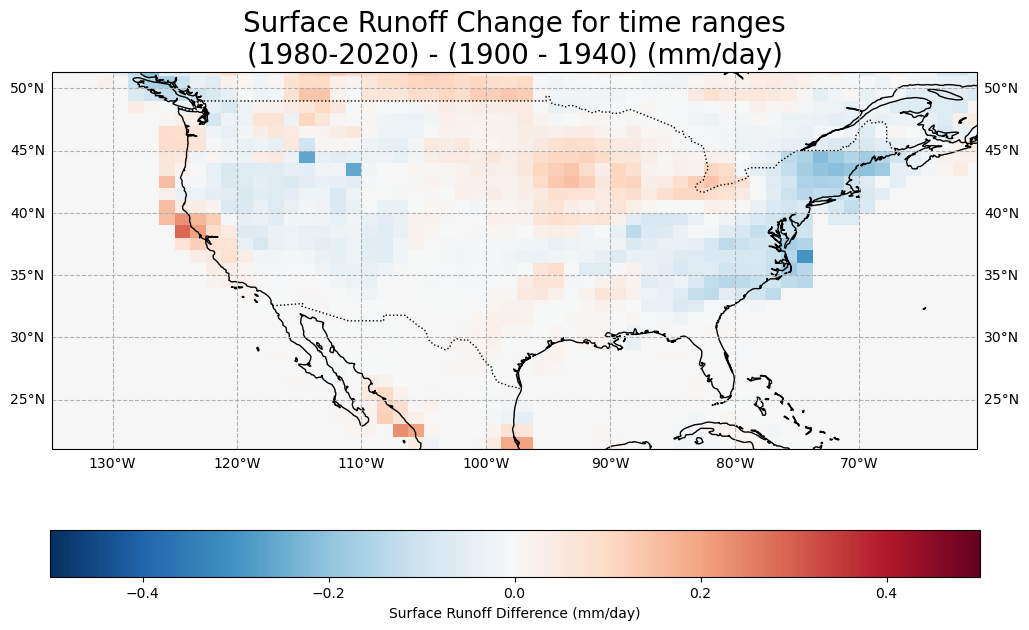

In [19]:
plot_difference(plot_ready_370_2, plot_ready_370_1, "(1980-2020) - (1900 - 1940)")

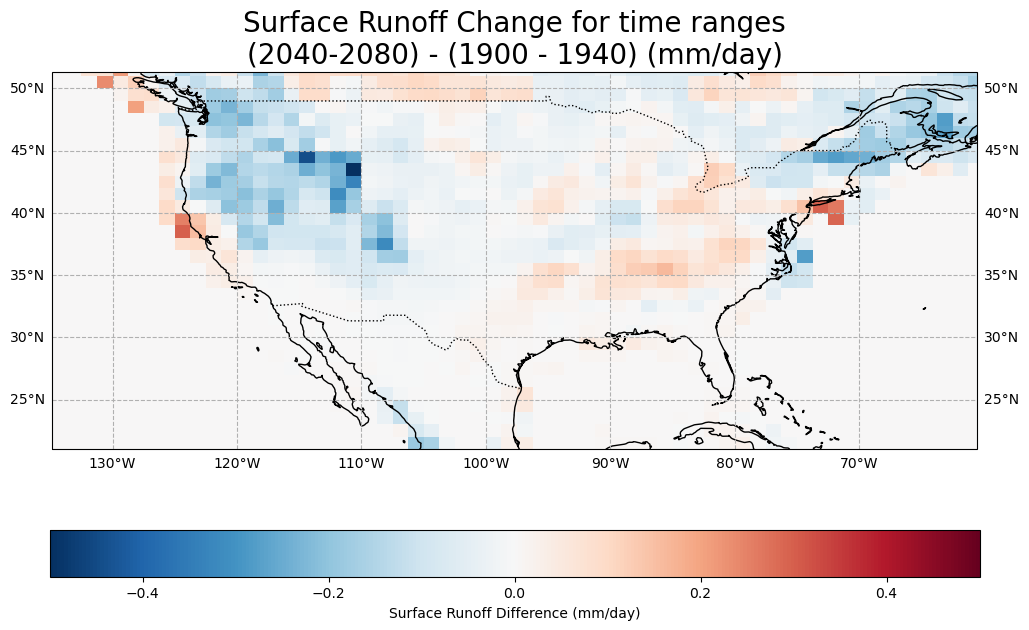

In [20]:
plot_difference(plot_ready_370_sim, plot_ready_370_1, "(2040-2080) - (1900 - 1940)")

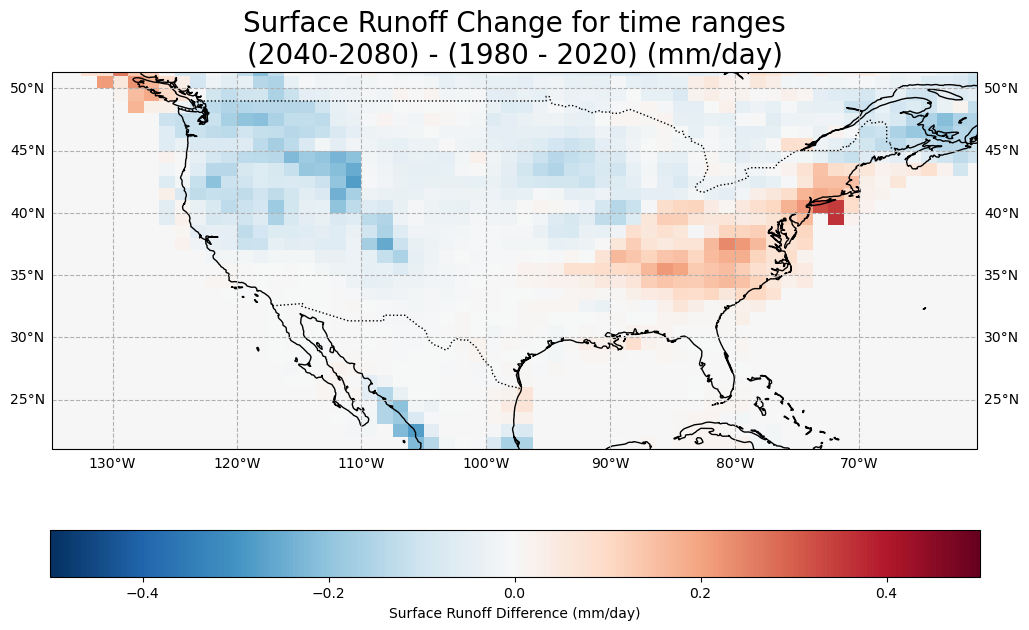

In [21]:
plot_difference(plot_ready_370_sim, plot_ready_370_2, "(2040-2080) - (1980 - 2020)")

The plots both are and aren't quite what I expected. Surface runoff seems to correlate with rainfall, which makes perfect sense. Some of the higher runoff parts of the country like SeaTac and the Northeast forests are also some of the rainiest parts of the country. It also makes sense that the runoff drifts so far in land, as not only is the east generally rainy, the Chesapeake Bay watershed is pretty far reaching (across 6 states). Although, that maybe means that surface runoff alone isn't a good indicator of the problems that can be caused by it. Regardless, runoff management should be a consideration when developing infrastructure in these areas, because it is a relevant factor to the local ecosystem and unmanaged stormwater can have negative effects if not managed properly. 

For the difference plot, overall the change between 1900-1940 and 1980-2020 is minimal. However for the change that is present, many of the low and high runoff areas increased and decreased their runoff respectively. Because runoff correlates so heavily with rainfall, this may suggest a trend of arid areas becoming less arid and vise versa for moisture rich ecosystems. Alternatively, because the increase in runoff tends to be occuring in areas that are hotspots for agriculture, the trend of rising surface runoff may being influenced by increased irrigation, as a result of the intensification of agriculture between the two time periods. Also potentially contntributing to the trends is urbanization (which may be the case for the bay area), and the rise of stormwater management strategies that reduce the amount of runoff directly by capturing water before it re-enters the system. Either way, this may highlight good or bad stormwater management in the countries most vulnerable ecosystems. It also may bring to our attention the potential problems caused by uncontrolled runoff from irrigated water. 

For both historical time periods, the simulation seems to suggest a vast intensifiation of these trends, which makes sense if the problems are thought of in terms of tipping points.